# Lecture 3 notebook - IRIS dataset
## Introduction to TensorFlow and Deep Learning

## IADS Summer School, 1st August 2022

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 3 of the course

### Load the Iris Dataset


In [1]:
import pandas as pd

#Load CSV files
inputs_train=pd.read_csv('datasets/iris_train.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_train = pd.read_csv('datasets/iris_train.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
inputs_test=pd.read_csv('datasets/iris_test.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_test = pd.read_csv('datasets/iris_test.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
# If the above line fails then try instead the following 4 lines, to download it directly from 
# my google drive account
#inputs_train=pd.read_csv('https://drive.google.com/uc?export=download&id=15g37AN8yaPJtuQwOnhuNuMIWcMr8vB9C',usecols = [0,1,2,3],skiprows = None,header=None).values
#labels_train = pd.read_csv('https://drive.google.com/uc?export=download&id=15g37AN8yaPJtuQwOnhuNuMIWcMr8vB9C',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
#inputs_test=pd.read_csv('https://drive.google.com/uc?export=download&id=1a7ok2PiILjhzrB3cUWmXvBmHY-cpZ6lc',usecols = [0,1,2,3],skiprows = None,header=None).values
#labels_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1a7ok2PiILjhzrB3cUWmXvBmHY-cpZ6lc',usecols = [4],skiprows = None ,header=None).values.reshape(-1)


print("Data loaded")
print("Train set inputs:",inputs_train)
print("Train set labels:",labels_train)
print("Test set inputs:",inputs_test)
print("Test set labels:",labels_test)


Data loaded
Train set inputs: [[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [6.9 3.1 5.1 2.3]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [5.2 2.7 3.9 1.4]
 [6.9 3.1 4.9 1.5]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [7.7 3.8 6.7 2.2]
 [6.3 3.3 4.7 1.6]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [6.4 3.2 5.3 2.3]
 [5.7 4.4 1.5 0.4]
 [6.7 3.3 5.7 2.1]
 [6.4 2.8 5.6 2.1]
 [5.4 3.9 1.3 0.4]
 [6.1 2.6 5.6 1.4]
 [7.2 3.  5.8 1.6]
 [5.2 3.5 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.3 2.3 4.4 1.3]
 [5.1 2.5 3.  1.1]
 [6.4 3.2 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [6.2 2.8 4.8 1.8]
 [6.9 3.2 5.7 2.3]
 [6.5 3.2 5.1 2. ]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.5 0.3]
 [4.8 3.  1.4 0.3]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.2 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.  2.2 5.  1.5]
 [4.8 3.4 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [4.6 3.6 1.  0.2]
 [7.2 3.2 6.  1.8]
 [5.  3.3 1.4 0.2]
 

#### Build the neural network

In [2]:
import tensorflow as tf
from tensorflow import keras

#Neural network
hids=[4,20,20,3]
k_l2=0
layer1=tf.keras.layers.Dense(hids[1], activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2))
layer2=tf.keras.layers.Dense(hids[2], activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2))
layer3=tf.keras.layers.Dense(hids[3], activation='softmax',kernel_regularizer=keras.regularizers.l2(k_l2))
keras_model = tf.keras.Sequential([layer1,layer2,layer3])
print(keras_model(inputs_train[0:1,:])) # we have to run the network once before the trainable_variables are created
print(keras_model.summary()) # Prints an overview of a keras model

tf.Tensor([[0.6234647  0.18875913 0.18777616]], shape=(1, 3), dtype=float32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 20)                   100       
                                                                 
 dense_1 (Dense)             (1, 20)                   420       
                                                                 
 dense_2 (Dense)             (1, 3)                    63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
None


#### Train the neural network

In [3]:
optimizer = tf.keras.optimizers.Adam()
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 

In [4]:
# Train loop
history = keras_model.fit(
    inputs_train,
    labels_train,
    batch_size=len(inputs_train),
    epochs=2000,
    validation_data=(inputs_test, labels_test),
)

Epoch 1/2000
1/1 [==============================] - 0s 422ms/step - loss: 1.2289 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.3270 - val_sparse_categorical_accuracy: 0.2667
Epoch 2/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.1871 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.2814 - val_sparse_categorical_accuracy: 0.2667
Epoch 3/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.1480 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.2387 - val_sparse_categorical_accuracy: 0.2667
Epoch 4/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.1119 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.1992 - val_sparse_categorical_accuracy: 0.2667
Epoch 5/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.0789 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.1628 - val_sparse_categorical_accuracy: 0.2667
Epoch 6/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0490 - sparse_categorical_acc

1/1 [==============================] - 0s 19ms/step - loss: 0.7013 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.7685 - val_sparse_categorical_accuracy: 0.5333
Epoch 47/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6957 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.7644 - val_sparse_categorical_accuracy: 0.5333
Epoch 48/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6902 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.7601 - val_sparse_categorical_accuracy: 0.5333
Epoch 49/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6847 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.7556 - val_sparse_categorical_accuracy: 0.5333
Epoch 50/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6792 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.7509 - val_sparse_categorical_accuracy: 0.5333
Epoch 51/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6738 - sparse_categorical_accuracy: 0.

1/1 [==============================] - 0s 16ms/step - loss: 0.5075 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.5756 - val_sparse_categorical_accuracy: 0.8000
Epoch 92/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.5046 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.5724 - val_sparse_categorical_accuracy: 0.8000
Epoch 93/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.5016 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.5693 - val_sparse_categorical_accuracy: 0.8000
Epoch 94/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.4987 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.5663 - val_sparse_categorical_accuracy: 0.8000
Epoch 95/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.4958 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.5632 - val_sparse_categorical_accuracy: 0.8000
Epoch 96/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4929 - sparse_categorical_accuracy: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.3920 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.4477 - val_sparse_categorical_accuracy: 0.9333
Epoch 137/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3896 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.4449 - val_sparse_categorical_accuracy: 0.9333
Epoch 138/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.4422 - val_sparse_categorical_accuracy: 0.9333
Epoch 139/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3849 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.4394 - val_sparse_categorical_accuracy: 0.9333
Epoch 140/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3825 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.4366 - val_sparse_categorical_accuracy: 0.9333
Epoch 141/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3801 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.2904 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3257 - val_sparse_categorical_accuracy: 0.9333
Epoch 182/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2883 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3231 - val_sparse_categorical_accuracy: 0.9333
Epoch 183/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2863 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3206 - val_sparse_categorical_accuracy: 0.9333
Epoch 184/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2842 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3180 - val_sparse_categorical_accuracy: 0.9333
Epoch 185/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3155 - val_sparse_categorical_accuracy: 0.9333
Epoch 186/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2801 - sparse_categorical_accurac

1/1 [==============================] - 0s 20ms/step - loss: 0.2064 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2230 - val_sparse_categorical_accuracy: 0.9667
Epoch 227/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.2048 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2210 - val_sparse_categorical_accuracy: 0.9667
Epoch 228/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.2032 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2191 - val_sparse_categorical_accuracy: 0.9667
Epoch 229/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.2016 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2172 - val_sparse_categorical_accuracy: 0.9667
Epoch 230/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2000 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2153 - val_sparse_categorical_accuracy: 0.9667
Epoch 231/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1984 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1465 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1514 - val_sparse_categorical_accuracy: 1.0000
Epoch 272/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1502 - val_sparse_categorical_accuracy: 1.0000
Epoch 273/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1489 - val_sparse_categorical_accuracy: 1.0000
Epoch 274/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1434 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1477 - val_sparse_categorical_accuracy: 1.0000
Epoch 275/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1466 - val_sparse_categorical_accuracy: 1.0000
Epoch 276/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1414 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1094 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1087 - val_sparse_categorical_accuracy: 1.0000
Epoch 317/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 1.0000
Epoch 318/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1082 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1073 - val_sparse_categorical_accuracy: 1.0000
Epoch 319/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1066 - val_sparse_categorical_accuracy: 1.0000
Epoch 320/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1060 - val_sparse_categorical_accuracy: 1.0000
Epoch 321/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1064 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0851 - val_sparse_categorical_accuracy: 1.0000
Epoch 362/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0847 - val_sparse_categorical_accuracy: 1.0000
Epoch 363/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0843 - val_sparse_categorical_accuracy: 1.0000
Epoch 364/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0839 - val_sparse_categorical_accuracy: 1.0000
Epoch 365/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0862 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0836 - val_sparse_categorical_accuracy: 1.0000
Epoch 366/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0859 - sparse_categorical_accurac

1/1 [==============================] - 0s 19ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0722 - val_sparse_categorical_accuracy: 1.0000
Epoch 407/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0743 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0720 - val_sparse_categorical_accuracy: 1.0000
Epoch 408/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0718 - val_sparse_categorical_accuracy: 1.0000
Epoch 409/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0738 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0716 - val_sparse_categorical_accuracy: 1.0000
Epoch 410/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0714 - val_sparse_categorical_accuracy: 1.0000
Epoch 411/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0734 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0660 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0652 - val_sparse_categorical_accuracy: 0.9667
Epoch 452/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9667
Epoch 453/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0650 - val_sparse_categorical_accuracy: 0.9667
Epoch 454/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0655 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9667
Epoch 455/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0654 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0648 - val_sparse_categorical_accuracy: 0.9667
Epoch 456/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0652 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0602 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9667
Epoch 497/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9667
Epoch 498/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9667
Epoch 499/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9667
Epoch 500/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9667
Epoch 501/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0596 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0559 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9667
Epoch 542/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9667
Epoch 543/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9667
Epoch 544/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0557 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9667
Epoch 545/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0556 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9667
Epoch 546/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0555 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 587/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 588/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 589/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0525 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 590/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 591/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0524 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.0501 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 632/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0501 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 633/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 634/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 635/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0588 - val_sparse_categorical_accuracy: 0.9667
Epoch 636/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0499 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0480 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0593 - val_sparse_categorical_accuracy: 0.9667
Epoch 677/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0593 - val_sparse_categorical_accuracy: 0.9667
Epoch 678/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9667
Epoch 679/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9667
Epoch 680/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9667
Epoch 681/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0478 - sparse_categorical_accurac

1/1 [==============================] - 0s 23ms/step - loss: 0.0462 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0602 - val_sparse_categorical_accuracy: 0.9667
Epoch 722/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667
Epoch 723/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667
Epoch 724/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667
Epoch 725/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667
Epoch 726/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0460 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.0446 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9667
Epoch 767/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9667
Epoch 768/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9667
Epoch 769/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9667
Epoch 770/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0616 - val_sparse_categorical_accuracy: 0.9667
Epoch 771/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0444 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667
Epoch 812/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667
Epoch 813/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667
Epoch 814/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9667
Epoch 815/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9667
Epoch 816/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0430 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0645 - val_sparse_categorical_accuracy: 0.9667
Epoch 857/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0645 - val_sparse_categorical_accuracy: 0.9667
Epoch 858/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9667
Epoch 859/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9667
Epoch 860/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9667
Epoch 861/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0417 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0663 - val_sparse_categorical_accuracy: 0.9667
Epoch 902/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0663 - val_sparse_categorical_accuracy: 0.9667
Epoch 903/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0663 - val_sparse_categorical_accuracy: 0.9667
Epoch 904/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9667
Epoch 905/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9667
Epoch 906/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0406 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9667
Epoch 947/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0682 - val_sparse_categorical_accuracy: 0.9667
Epoch 948/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0682 - val_sparse_categorical_accuracy: 0.9667
Epoch 949/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0683 - val_sparse_categorical_accuracy: 0.9667
Epoch 950/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0683 - val_sparse_categorical_accuracy: 0.9667
Epoch 951/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0395 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0701 - val_sparse_categorical_accuracy: 0.9667
Epoch 992/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0702 - val_sparse_categorical_accuracy: 0.9667
Epoch 993/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0702 - val_sparse_categorical_accuracy: 0.9667
Epoch 994/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0703 - val_sparse_categorical_accuracy: 0.9667
Epoch 995/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0703 - val_sparse_categorical_accuracy: 0.9667
Epoch 996/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0385 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0722 - val_sparse_categorical_accuracy: 0.9667
Epoch 1037/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0723 - val_sparse_categorical_accuracy: 0.9667
Epoch 1038/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0723 - val_sparse_categorical_accuracy: 0.9667
Epoch 1039/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0376 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0724 - val_sparse_categorical_accuracy: 0.9667
Epoch 1040/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0376 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0724 - val_sparse_categorical_accuracy: 0.9667
Epoch 1041/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0376 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0744 - val_sparse_categorical_accuracy: 0.9667
Epoch 1082/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0745 - val_sparse_categorical_accuracy: 0.9667
Epoch 1083/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0745 - val_sparse_categorical_accuracy: 0.9667
Epoch 1084/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0746 - val_sparse_categorical_accuracy: 0.9667
Epoch 1085/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0746 - val_sparse_categorical_accuracy: 0.9667
Epoch 1086/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0367 - sparse_categorical_ac

1/1 [==============================] - 0s 20ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0767 - val_sparse_categorical_accuracy: 0.9667
Epoch 1127/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9667
Epoch 1128/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9667
Epoch 1129/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0769 - val_sparse_categorical_accuracy: 0.9667
Epoch 1130/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0769 - val_sparse_categorical_accuracy: 0.9667
Epoch 1131/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0359 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0791 - val_sparse_categorical_accuracy: 0.9667
Epoch 1172/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0791 - val_sparse_categorical_accuracy: 0.9667
Epoch 1173/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0792 - val_sparse_categorical_accuracy: 0.9667
Epoch 1174/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0792 - val_sparse_categorical_accuracy: 0.9667
Epoch 1175/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0793 - val_sparse_categorical_accuracy: 0.9667
Epoch 1176/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0815 - val_sparse_categorical_accuracy: 0.9667
Epoch 1217/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0816 - val_sparse_categorical_accuracy: 0.9667
Epoch 1218/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0817 - val_sparse_categorical_accuracy: 0.9667
Epoch 1219/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0817 - val_sparse_categorical_accuracy: 0.9667
Epoch 1220/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0818 - val_sparse_categorical_accuracy: 0.9667
Epoch 1221/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0344 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0841 - val_sparse_categorical_accuracy: 0.9667
Epoch 1262/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0841 - val_sparse_categorical_accuracy: 0.9667
Epoch 1263/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0842 - val_sparse_categorical_accuracy: 0.9667
Epoch 1264/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0843 - val_sparse_categorical_accuracy: 0.9667
Epoch 1265/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0843 - val_sparse_categorical_accuracy: 0.9667
Epoch 1266/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0338 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0332 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0867 - val_sparse_categorical_accuracy: 0.9667
Epoch 1307/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0332 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0868 - val_sparse_categorical_accuracy: 0.9667
Epoch 1308/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0332 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0868 - val_sparse_categorical_accuracy: 0.9667
Epoch 1309/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 0.9667
Epoch 1310/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 0.9667
Epoch 1311/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0331 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0326 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0892 - val_sparse_categorical_accuracy: 0.9667
Epoch 1352/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0898 - val_sparse_categorical_accuracy: 0.9667
Epoch 1353/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0891 - val_sparse_categorical_accuracy: 0.9667
Epoch 1354/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0902 - val_sparse_categorical_accuracy: 0.9667
Epoch 1355/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0889 - val_sparse_categorical_accuracy: 0.9667
Epoch 1356/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0325 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0922 - val_sparse_categorical_accuracy: 0.9667
Epoch 1397/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0924 - val_sparse_categorical_accuracy: 0.9667
Epoch 1398/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0922 - val_sparse_categorical_accuracy: 0.9667
Epoch 1399/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0925 - val_sparse_categorical_accuracy: 0.9667
Epoch 1400/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0924 - val_sparse_categorical_accuracy: 0.9667
Epoch 1401/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0319 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0951 - val_sparse_categorical_accuracy: 0.9667
Epoch 1442/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0952 - val_sparse_categorical_accuracy: 0.9667
Epoch 1443/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0953 - val_sparse_categorical_accuracy: 0.9667
Epoch 1444/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0953 - val_sparse_categorical_accuracy: 0.9667
Epoch 1445/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0954 - val_sparse_categorical_accuracy: 0.9667
Epoch 1446/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0314 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0981 - val_sparse_categorical_accuracy: 0.9667
Epoch 1487/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0981 - val_sparse_categorical_accuracy: 0.9667
Epoch 1488/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0982 - val_sparse_categorical_accuracy: 0.9667
Epoch 1489/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9667
Epoch 1490/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0984 - val_sparse_categorical_accuracy: 0.9667
Epoch 1491/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0308 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1018 - val_sparse_categorical_accuracy: 0.9667
Epoch 1532/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1007 - val_sparse_categorical_accuracy: 0.9667
Epoch 1533/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1015 - val_sparse_categorical_accuracy: 0.9667
Epoch 1534/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1016 - val_sparse_categorical_accuracy: 0.9667
Epoch 1535/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9667
Epoch 1536/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0303 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9667
Epoch 1577/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9667
Epoch 1578/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 1579/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1045 - val_sparse_categorical_accuracy: 0.9667
Epoch 1580/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1045 - val_sparse_categorical_accuracy: 0.9667
Epoch 1581/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0298 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1075 - val_sparse_categorical_accuracy: 0.9667
Epoch 1622/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1076 - val_sparse_categorical_accuracy: 0.9667
Epoch 1623/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1077 - val_sparse_categorical_accuracy: 0.9667
Epoch 1624/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1077 - val_sparse_categorical_accuracy: 0.9667
Epoch 1625/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9667
Epoch 1626/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0294 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1118 - val_sparse_categorical_accuracy: 0.9667
Epoch 1667/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1096 - val_sparse_categorical_accuracy: 0.9667
Epoch 1668/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1125 - val_sparse_categorical_accuracy: 0.9667
Epoch 1669/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1093 - val_sparse_categorical_accuracy: 0.9667
Epoch 1670/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1127 - val_sparse_categorical_accuracy: 0.9667
Epoch 1671/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0289 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1140 - val_sparse_categorical_accuracy: 0.9667
Epoch 1712/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1144 - val_sparse_categorical_accuracy: 0.9667
Epoch 1713/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9667
Epoch 1714/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9667
Epoch 1715/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9667
Epoch 1716/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0285 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1176 - val_sparse_categorical_accuracy: 0.9667
Epoch 1757/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1177 - val_sparse_categorical_accuracy: 0.9667
Epoch 1758/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1178 - val_sparse_categorical_accuracy: 0.9667
Epoch 1759/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1179 - val_sparse_categorical_accuracy: 0.9667
Epoch 1760/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1179 - val_sparse_categorical_accuracy: 0.9667
Epoch 1761/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0281 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1207 - val_sparse_categorical_accuracy: 0.9667
Epoch 1802/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1217 - val_sparse_categorical_accuracy: 0.9667
Epoch 1803/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1206 - val_sparse_categorical_accuracy: 0.9667
Epoch 1804/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1223 - val_sparse_categorical_accuracy: 0.9667
Epoch 1805/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1202 - val_sparse_categorical_accuracy: 0.9667
Epoch 1806/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0277 - sparse_categorical_ac

1/1 [==============================] - 0s 20ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1244 - val_sparse_categorical_accuracy: 0.9667
Epoch 1847/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1249 - val_sparse_categorical_accuracy: 0.9667
Epoch 1848/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1248 - val_sparse_categorical_accuracy: 0.9667
Epoch 1849/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1248 - val_sparse_categorical_accuracy: 0.9667
Epoch 1850/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1252 - val_sparse_categorical_accuracy: 0.9667
Epoch 1851/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0273 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1282 - val_sparse_categorical_accuracy: 0.9667
Epoch 1892/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1284 - val_sparse_categorical_accuracy: 0.9667
Epoch 1893/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1284 - val_sparse_categorical_accuracy: 0.9667
Epoch 1894/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1285 - val_sparse_categorical_accuracy: 0.9667
Epoch 1895/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1286 - val_sparse_categorical_accuracy: 0.9667
Epoch 1896/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0269 - sparse_categorical_ac

1/1 [==============================] - 0s 19ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1321 - val_sparse_categorical_accuracy: 0.9667
Epoch 1937/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1317 - val_sparse_categorical_accuracy: 0.9667
Epoch 1938/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1324 - val_sparse_categorical_accuracy: 0.9667
Epoch 1939/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1317 - val_sparse_categorical_accuracy: 0.9667
Epoch 1940/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1329 - val_sparse_categorical_accuracy: 0.9667
Epoch 1941/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0265 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1353 - val_sparse_categorical_accuracy: 0.9667
Epoch 1982/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1359 - val_sparse_categorical_accuracy: 0.9667
Epoch 1983/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1358 - val_sparse_categorical_accuracy: 0.9667
Epoch 1984/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1357 - val_sparse_categorical_accuracy: 0.9667
Epoch 1985/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1362 - val_sparse_categorical_accuracy: 0.9667
Epoch 1986/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0261 - sparse_categorical_ac

In [5]:
optimizer = tf.keras.optimizers.Adam()
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 


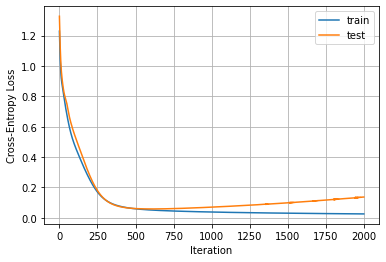

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.xlabel("Iteration")
plt.ylabel('Cross-Entropy Loss')
plt.grid()
plt.legend()
plt.show()

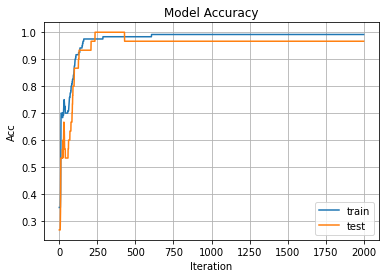

In [7]:
#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="test")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## Save the trained model

In [8]:
keras_model.save("IrisModel")

INFO:tensorflow:Assets written to: IrisModel\assets


## Check we can re-load our saved model back in
- And check it still works (we will print its accuracy on the test set!)

In [9]:
keras_model = keras.models.load_model('IrisModel') # just need to give it a folder name here.
model2.summary()
predictions=model2(inputs_test)
accuracy_metric=keras.metrics.SparseCategoricalAccuracy()
print("Accuracy of saved model on test set",accuracy_metric(labels_test,predictions).numpy())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
Accuracy of saved model on test set 0.96666664


## Fighting Overfitting: L2 Regularisation


retrain your NN with 𝑘𝐿2 = 0.001

In [10]:
import tensorflow as tf
from tensorflow import keras

#Neural network
hids=[4,20,20,3]
k_l2=0.001
layer1=tf.keras.layers.Dense(hids[1], activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2))
layer2=tf.keras.layers.Dense(hids[2], activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2))
layer3=tf.keras.layers.Dense(hids[3], activation='softmax',kernel_regularizer=keras.regularizers.l2(k_l2))
keras_model = tf.keras.Sequential([layer1,layer2,layer3])
print(keras_model(inputs_train[0:1,:])) # we have to run the network once before the trainable_variables are created
print(keras_model.summary()) # Prints an overview of a keras model

tf.Tensor([[0.2686007  0.5431909  0.18820842]], shape=(1, 3), dtype=float32)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (1, 20)                   100       
                                                                 
 dense_4 (Dense)             (1, 20)                   420       
                                                                 
 dense_5 (Dense)             (1, 3)                    63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
optimizer = tf.keras.optimizers.Adam()
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 


In [12]:
# Train loop
history = keras_model.fit(
    inputs_train,
    labels_train,
    batch_size=len(inputs_train),
    epochs=2000,
    validation_data=(inputs_test, labels_test),
)

Epoch 1/2000
1/1 [==============================] - 0s 383ms/step - loss: 1.2409 - sparse_categorical_accuracy: 0.4417 - val_loss: 1.1426 - val_sparse_categorical_accuracy: 0.6000
Epoch 2/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.2093 - sparse_categorical_accuracy: 0.5583 - val_loss: 1.1213 - val_sparse_categorical_accuracy: 0.6333
Epoch 3/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.1786 - sparse_categorical_accuracy: 0.5750 - val_loss: 1.1007 - val_sparse_categorical_accuracy: 0.6333
Epoch 4/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1486 - sparse_categorical_accuracy: 0.5917 - val_loss: 1.0808 - val_sparse_categorical_accuracy: 0.6333
Epoch 5/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1195 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.0615 - val_sparse_categorical_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.0912 - sparse_categorical_acc

1/1 [==============================] - 0s 19ms/step - loss: 0.5092 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.5906 - val_sparse_categorical_accuracy: 0.7000
Epoch 47/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.5035 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.5839 - val_sparse_categorical_accuracy: 0.7000
Epoch 48/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.4981 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.5774 - val_sparse_categorical_accuracy: 0.7667
Epoch 49/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4928 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.5711 - val_sparse_categorical_accuracy: 0.7667
Epoch 50/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.4878 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.5649 - val_sparse_categorical_accuracy: 0.8000
Epoch 51/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4829 - sparse_categorical_accuracy: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.3618 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4147 - val_sparse_categorical_accuracy: 0.9333
Epoch 92/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.3596 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4120 - val_sparse_categorical_accuracy: 0.9333
Epoch 93/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.3573 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4093 - val_sparse_categorical_accuracy: 0.9333
Epoch 94/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.3550 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4066 - val_sparse_categorical_accuracy: 0.9333
Epoch 95/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.3528 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4040 - val_sparse_categorical_accuracy: 0.9333
Epoch 96/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3506 - sparse_categorical_accuracy: 0.

1/1 [==============================] - 0s 16ms/step - loss: 0.2723 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3048 - val_sparse_categorical_accuracy: 0.9333
Epoch 137/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2707 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3027 - val_sparse_categorical_accuracy: 0.9333
Epoch 138/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2690 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3007 - val_sparse_categorical_accuracy: 0.9333
Epoch 139/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2674 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2986 - val_sparse_categorical_accuracy: 0.9333
Epoch 140/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2657 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2966 - val_sparse_categorical_accuracy: 0.9667
Epoch 141/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2641 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.2115 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2288 - val_sparse_categorical_accuracy: 0.9667
Epoch 182/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2105 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2275 - val_sparse_categorical_accuracy: 0.9667
Epoch 183/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2094 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2262 - val_sparse_categorical_accuracy: 0.9667
Epoch 184/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2084 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2249 - val_sparse_categorical_accuracy: 0.9667
Epoch 185/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.2074 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.2236 - val_sparse_categorical_accuracy: 0.9667
Epoch 186/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2064 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.1740 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1820 - val_sparse_categorical_accuracy: 0.9667
Epoch 227/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1734 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1812 - val_sparse_categorical_accuracy: 0.9667
Epoch 228/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1727 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1804 - val_sparse_categorical_accuracy: 0.9667
Epoch 229/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.1721 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1796 - val_sparse_categorical_accuracy: 0.9667
Epoch 230/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1789 - val_sparse_categorical_accuracy: 0.9667
Epoch 231/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1709 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.1508 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1538 - val_sparse_categorical_accuracy: 0.9667
Epoch 272/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1504 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1533 - val_sparse_categorical_accuracy: 0.9667
Epoch 273/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1500 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1528 - val_sparse_categorical_accuracy: 0.9667
Epoch 274/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1496 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1523 - val_sparse_categorical_accuracy: 0.9667
Epoch 275/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1492 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1519 - val_sparse_categorical_accuracy: 0.9667
Epoch 276/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1488 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.1360 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1365 - val_sparse_categorical_accuracy: 0.9667
Epoch 317/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1357 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1362 - val_sparse_categorical_accuracy: 0.9667
Epoch 318/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1359 - val_sparse_categorical_accuracy: 0.9667
Epoch 319/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1352 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1356 - val_sparse_categorical_accuracy: 0.9667
Epoch 320/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1349 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1353 - val_sparse_categorical_accuracy: 0.9667
Epoch 321/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1347 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1260 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1256 - val_sparse_categorical_accuracy: 0.9667
Epoch 362/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1259 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1254 - val_sparse_categorical_accuracy: 0.9667
Epoch 363/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1252 - val_sparse_categorical_accuracy: 0.9667
Epoch 364/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1250 - val_sparse_categorical_accuracy: 0.9667
Epoch 365/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1248 - val_sparse_categorical_accuracy: 0.9667
Epoch 366/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1252 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1191 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1185 - val_sparse_categorical_accuracy: 0.9667
Epoch 407/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1183 - val_sparse_categorical_accuracy: 0.9667
Epoch 408/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1188 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1182 - val_sparse_categorical_accuracy: 0.9667
Epoch 409/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1181 - val_sparse_categorical_accuracy: 0.9667
Epoch 410/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1186 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1180 - val_sparse_categorical_accuracy: 0.9667
Epoch 411/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1184 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.1140 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1137 - val_sparse_categorical_accuracy: 0.9667
Epoch 452/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1136 - val_sparse_categorical_accuracy: 0.9667
Epoch 453/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1138 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1136 - val_sparse_categorical_accuracy: 0.9667
Epoch 454/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1135 - val_sparse_categorical_accuracy: 0.9667
Epoch 455/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1134 - val_sparse_categorical_accuracy: 0.9667
Epoch 456/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1135 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 1.0000
Epoch 497/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1100 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1104 - val_sparse_categorical_accuracy: 1.0000
Epoch 498/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1103 - val_sparse_categorical_accuracy: 1.0000
Epoch 499/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1103 - val_sparse_categorical_accuracy: 1.0000
Epoch 500/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1102 - val_sparse_categorical_accuracy: 1.0000
Epoch 501/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1097 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1081 - val_sparse_categorical_accuracy: 0.9667
Epoch 542/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1081 - val_sparse_categorical_accuracy: 0.9667
Epoch 543/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1081 - val_sparse_categorical_accuracy: 0.9667
Epoch 544/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 0.9667
Epoch 545/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 0.9667
Epoch 546/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1067 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 587/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 588/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1064 - val_sparse_categorical_accuracy: 0.9667
Epoch 589/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1064 - val_sparse_categorical_accuracy: 0.9667
Epoch 590/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1064 - val_sparse_categorical_accuracy: 0.9667
Epoch 591/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1042 - sparse_categorical_accurac

1/1 [==============================] - 0s 19ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1053 - val_sparse_categorical_accuracy: 0.9667
Epoch 632/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1052 - val_sparse_categorical_accuracy: 0.9667
Epoch 633/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1052 - val_sparse_categorical_accuracy: 0.9667
Epoch 634/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1052 - val_sparse_categorical_accuracy: 0.9667
Epoch 635/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1021 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1052 - val_sparse_categorical_accuracy: 0.9667
Epoch 636/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1021 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1004 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 677/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1004 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 678/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1004 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 679/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9667
Epoch 680/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9667
Epoch 681/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1003 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9667
Epoch 722/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0987 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9667
Epoch 723/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0987 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9667
Epoch 724/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0987 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9667
Epoch 725/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0986 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9667
Epoch 726/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0986 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0973 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 767/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0972 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 768/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0972 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 769/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0972 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 770/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0971 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 771/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0971 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 812/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 813/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 814/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 815/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 816/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0957 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.0946 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 857/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 858/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 859/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 860/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 861/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0944 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9667
Epoch 902/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9667
Epoch 903/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9667
Epoch 904/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9667
Epoch 905/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9667
Epoch 906/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0932 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 947/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 948/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 949/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 950/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9667
Epoch 951/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0920 - sparse_categorical_accurac

1/1 [==============================] - 0s 20ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 992/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 993/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 994/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 995/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1030 - val_sparse_categorical_accuracy: 0.9667
Epoch 996/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0909 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.0900 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 1037/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0900 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 1038/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 1039/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 1040/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9667
Epoch 1041/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0899 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9667
Epoch 1082/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9667
Epoch 1083/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9667
Epoch 1084/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9667
Epoch 1085/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9667
Epoch 1086/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0888 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1039 - val_sparse_categorical_accuracy: 0.9667
Epoch 1127/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1039 - val_sparse_categorical_accuracy: 0.9667
Epoch 1128/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1039 - val_sparse_categorical_accuracy: 0.9667
Epoch 1129/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1040 - val_sparse_categorical_accuracy: 0.9667
Epoch 1130/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1040 - val_sparse_categorical_accuracy: 0.9667
Epoch 1131/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0878 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 1172/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 1173/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 1174/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 1175/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9667
Epoch 1176/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0869 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9667
Epoch 1217/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9667
Epoch 1218/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9667
Epoch 1219/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1049 - val_sparse_categorical_accuracy: 0.9667
Epoch 1220/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1049 - val_sparse_categorical_accuracy: 0.9667
Epoch 1221/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0859 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1053 - val_sparse_categorical_accuracy: 0.9667
Epoch 1262/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1054 - val_sparse_categorical_accuracy: 0.9667
Epoch 1263/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1054 - val_sparse_categorical_accuracy: 0.9667
Epoch 1264/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1054 - val_sparse_categorical_accuracy: 0.9667
Epoch 1265/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1054 - val_sparse_categorical_accuracy: 0.9667
Epoch 1266/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0850 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0843 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9667
Epoch 1307/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9667
Epoch 1308/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9667
Epoch 1309/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9667
Epoch 1310/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1060 - val_sparse_categorical_accuracy: 0.9667
Epoch 1311/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0842 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 1352/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 1353/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 1354/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 1355/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1066 - val_sparse_categorical_accuracy: 0.9667
Epoch 1356/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0833 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9667
Epoch 1397/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9667
Epoch 1398/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9667
Epoch 1399/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1072 - val_sparse_categorical_accuracy: 0.9667
Epoch 1400/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1072 - val_sparse_categorical_accuracy: 0.9667
Epoch 1401/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0825 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0818 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9667
Epoch 1442/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0818 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9667
Epoch 1443/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9667
Epoch 1444/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9667
Epoch 1445/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9667
Epoch 1446/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0817 - sparse_categorical_ac

1/1 [==============================] - 0s 22ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1084 - val_sparse_categorical_accuracy: 0.9667
Epoch 1487/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1084 - val_sparse_categorical_accuracy: 0.9667
Epoch 1488/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1084 - val_sparse_categorical_accuracy: 0.9667
Epoch 1489/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1085 - val_sparse_categorical_accuracy: 0.9667
Epoch 1490/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1085 - val_sparse_categorical_accuracy: 0.9667
Epoch 1491/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0809 - sparse_categorical_ac

1/1 [==============================] - 0s 19ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9667
Epoch 1532/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9667
Epoch 1533/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9667
Epoch 1534/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9667
Epoch 1535/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9667
Epoch 1536/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0802 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1098 - val_sparse_categorical_accuracy: 0.9667
Epoch 1577/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1098 - val_sparse_categorical_accuracy: 0.9667
Epoch 1578/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1098 - val_sparse_categorical_accuracy: 0.9667
Epoch 1579/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1098 - val_sparse_categorical_accuracy: 0.9667
Epoch 1580/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1098 - val_sparse_categorical_accuracy: 0.9667
Epoch 1581/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0794 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1104 - val_sparse_categorical_accuracy: 0.9667
Epoch 1622/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9667
Epoch 1623/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9667
Epoch 1624/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9667
Epoch 1625/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9667
Epoch 1626/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0787 - sparse_categorical_ac

1/1 [==============================] - 0s 19ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1111 - val_sparse_categorical_accuracy: 0.9667
Epoch 1667/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1111 - val_sparse_categorical_accuracy: 0.9667
Epoch 1668/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1112 - val_sparse_categorical_accuracy: 0.9667
Epoch 1669/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1112 - val_sparse_categorical_accuracy: 0.9667
Epoch 1670/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1112 - val_sparse_categorical_accuracy: 0.9667
Epoch 1671/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0781 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1118 - val_sparse_categorical_accuracy: 0.9667
Epoch 1712/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1118 - val_sparse_categorical_accuracy: 0.9667
Epoch 1713/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9667
Epoch 1714/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9667
Epoch 1715/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9667
Epoch 1716/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0774 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0769 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1125 - val_sparse_categorical_accuracy: 0.9667
Epoch 1757/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0769 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1125 - val_sparse_categorical_accuracy: 0.9667
Epoch 1758/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0769 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1126 - val_sparse_categorical_accuracy: 0.9667
Epoch 1759/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1126 - val_sparse_categorical_accuracy: 0.9667
Epoch 1760/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1126 - val_sparse_categorical_accuracy: 0.9667
Epoch 1761/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0768 - sparse_categorical_ac

1/1 [==============================] - 0s 20ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1132 - val_sparse_categorical_accuracy: 0.9667
Epoch 1802/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1132 - val_sparse_categorical_accuracy: 0.9667
Epoch 1803/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1132 - val_sparse_categorical_accuracy: 0.9667
Epoch 1804/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1133 - val_sparse_categorical_accuracy: 0.9667
Epoch 1805/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1133 - val_sparse_categorical_accuracy: 0.9667
Epoch 1806/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0762 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1139 - val_sparse_categorical_accuracy: 0.9667
Epoch 1847/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1139 - val_sparse_categorical_accuracy: 0.9667
Epoch 1848/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1139 - val_sparse_categorical_accuracy: 0.9667
Epoch 1849/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1140 - val_sparse_categorical_accuracy: 0.9667
Epoch 1850/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1140 - val_sparse_categorical_accuracy: 0.9667
Epoch 1851/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0756 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1146 - val_sparse_categorical_accuracy: 0.9667
Epoch 1892/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1146 - val_sparse_categorical_accuracy: 0.9667
Epoch 1893/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1146 - val_sparse_categorical_accuracy: 0.9667
Epoch 1894/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1147 - val_sparse_categorical_accuracy: 0.9667
Epoch 1895/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1147 - val_sparse_categorical_accuracy: 0.9667
Epoch 1896/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0751 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1153 - val_sparse_categorical_accuracy: 0.9667
Epoch 1937/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1153 - val_sparse_categorical_accuracy: 0.9667
Epoch 1938/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1154 - val_sparse_categorical_accuracy: 0.9667
Epoch 1939/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1154 - val_sparse_categorical_accuracy: 0.9667
Epoch 1940/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1154 - val_sparse_categorical_accuracy: 0.9667
Epoch 1941/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0746 - sparse_categorical_ac

1/1 [==============================] - 0s 21ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1163 - val_sparse_categorical_accuracy: 0.9667
Epoch 1982/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1166 - val_sparse_categorical_accuracy: 0.9667
Epoch 1983/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1162 - val_sparse_categorical_accuracy: 0.9667
Epoch 1984/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1170 - val_sparse_categorical_accuracy: 0.9667
Epoch 1985/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.1158 - val_sparse_categorical_accuracy: 0.9667
Epoch 1986/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0739 - sparse_categorical_ac

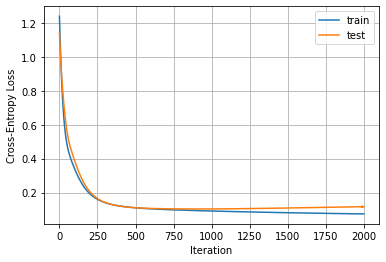

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.xlabel("Iteration")
plt.ylabel('Cross-Entropy Loss')
plt.grid()
plt.legend()
plt.show()

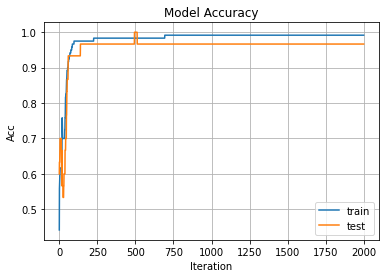

In [14]:
#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="test")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

In [15]:
keras_model.save("IrisModel")

INFO:tensorflow:Assets written to: IrisModel\assets


In [16]:
model2 = keras.models.load_model('IrisModel') # just need to give it a folder name here.
model2.summary()
predictions=model2(inputs_test)
accuracy_metric=keras.metrics.SparseCategoricalAccuracy()
print("Accuracy of saved model on test set",accuracy_metric(labels_test,predictions).numpy())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                100       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
Accuracy of saved model on test set 0.96666664


## Fighting Overfitting: Dropout

retrain your NN with dropout 𝑟𝑎𝑡𝑒 = 0.5 (and no L2)

In [17]:
import tensorflow as tf
from tensorflow import keras

hids=[4,20,20,3]
layer1=tf.keras.layers.Dense(hids[1], activation=tf.tanh)
layer1do=tf.keras.layers.Dropout(rate=0.5)
layer2=tf.keras.layers.Dense(hids[2], activation=tf.tanh)
layer2do=tf.keras.layers.Dropout(rate=0.5)
layer3=tf.keras.layers.Dense(hids[3], activation=tf.keras.activations.softmax)
keras_model = tf.keras.Sequential([layer1,layer1do,layer2,layer2do,layer3])
print(keras_model(inputs_train[0:1,:])) # we have to run the network once before the trainable_variables are created
print(keras_model.summary()) # Prints an overview of a keras model

tf.Tensor([[0.53964466 0.07102129 0.38933408]], shape=(1, 3), dtype=float32)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (1, 20)                   100       
                                                                 
 dropout (Dropout)           (1, 20)                   0         
                                                                 
 dense_7 (Dense)             (1, 20)                   420       
                                                                 
 dropout_1 (Dropout)         (1, 20)                   0         
                                                                 
 dense_8 (Dense)             (1, 3)                    63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_____________________________________________

In [18]:
optimizer = tf.keras.optimizers.Adam()
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 


In [19]:
# Train loop
history = keras_model.fit(
    inputs_train,
    labels_train,
    batch_size=len(inputs_train),
    epochs=2000,
    validation_data=(inputs_test, labels_test),
)

Epoch 1/2000
1/1 [==============================] - 0s 361ms/step - loss: 1.6433 - sparse_categorical_accuracy: 0.2250 - val_loss: 1.6934 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.7024 - sparse_categorical_accuracy: 0.2417 - val_loss: 1.6659 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.4827 - sparse_categorical_accuracy: 0.3167 - val_loss: 1.6392 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.6033 - sparse_categorical_accuracy: 0.3167 - val_loss: 1.6122 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.5029 - sparse_categorical_accuracy: 0.3167 - val_loss: 1.5863 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.5311 - sp

1/1 [==============================] - 0s 18ms/step - loss: 1.1954 - sparse_categorical_accuracy: 0.3583 - val_loss: 1.0446 - val_sparse_categorical_accuracy: 0.5333
Epoch 47/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.1939 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.0413 - val_sparse_categorical_accuracy: 0.5333
Epoch 48/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.3220 - sparse_categorical_accuracy: 0.2833 - val_loss: 1.0381 - val_sparse_categorical_accuracy: 0.6000
Epoch 49/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.2871 - sparse_categorical_accuracy: 0.3917 - val_loss: 1.0353 - val_sparse_categorical_accuracy: 0.6000
Epoch 50/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.1321 - sparse_categorical_accuracy: 0.4250 - val_loss: 1.0324 - val_sparse_categorical_accuracy: 0.6000
Epoch 51/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.2546 - sparse_categorical_accuracy: 0.

1/1 [==============================] - 0s 16ms/step - loss: 1.0958 - sparse_categorical_accuracy: 0.4833 - val_loss: 0.9213 - val_sparse_categorical_accuracy: 0.5333
Epoch 92/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.9600 - sparse_categorical_accuracy: 0.4750 - val_loss: 0.9169 - val_sparse_categorical_accuracy: 0.5333
Epoch 93/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.0159 - sparse_categorical_accuracy: 0.4583 - val_loss: 0.9126 - val_sparse_categorical_accuracy: 0.5333
Epoch 94/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.0751 - sparse_categorical_accuracy: 0.4833 - val_loss: 0.9080 - val_sparse_categorical_accuracy: 0.5333
Epoch 95/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.9279 - sparse_categorical_accuracy: 0.5333 - val_loss: 0.9033 - val_sparse_categorical_accuracy: 0.5333
Epoch 96/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.9753 - sparse_categorical_accuracy: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.7630 - sparse_categorical_accuracy: 0.7083 - val_loss: 0.7072 - val_sparse_categorical_accuracy: 0.6000
Epoch 137/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.7023 - sparse_categorical_accuracy: 0.6833 - val_loss: 0.7025 - val_sparse_categorical_accuracy: 0.6000
Epoch 138/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.7404 - sparse_categorical_accuracy: 0.6667 - val_loss: 0.6976 - val_sparse_categorical_accuracy: 0.6000
Epoch 139/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6967 - sparse_categorical_accuracy: 0.7167 - val_loss: 0.6924 - val_sparse_categorical_accuracy: 0.6000
Epoch 140/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.7730 - sparse_categorical_accuracy: 0.6333 - val_loss: 0.6873 - val_sparse_categorical_accuracy: 0.6000
Epoch 141/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.7495 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.6159 - sparse_categorical_accuracy: 0.7083 - val_loss: 0.5408 - val_sparse_categorical_accuracy: 0.7000
Epoch 182/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5424 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.5381 - val_sparse_categorical_accuracy: 0.7000
Epoch 183/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6173 - sparse_categorical_accuracy: 0.7083 - val_loss: 0.5356 - val_sparse_categorical_accuracy: 0.7000
Epoch 184/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6169 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.5332 - val_sparse_categorical_accuracy: 0.7000
Epoch 185/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5243 - sparse_categorical_accuracy: 0.7833 - val_loss: 0.5311 - val_sparse_categorical_accuracy: 0.7000
Epoch 186/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.5353 - sparse_categorical_accurac

1/1 [==============================] - 0s 19ms/step - loss: 0.4976 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.4448 - val_sparse_categorical_accuracy: 0.8667
Epoch 227/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4481 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.4425 - val_sparse_categorical_accuracy: 0.8667
Epoch 228/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.4577 - sparse_categorical_accuracy: 0.7833 - val_loss: 0.4402 - val_sparse_categorical_accuracy: 0.9000
Epoch 229/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5047 - sparse_categorical_accuracy: 0.8083 - val_loss: 0.4385 - val_sparse_categorical_accuracy: 0.9000
Epoch 230/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.4812 - sparse_categorical_accuracy: 0.7833 - val_loss: 0.4369 - val_sparse_categorical_accuracy: 0.9000
Epoch 231/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.4609 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.4074 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.3869 - val_sparse_categorical_accuracy: 0.9000
Epoch 272/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3974 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.3842 - val_sparse_categorical_accuracy: 0.9000
Epoch 273/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.4172 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.3814 - val_sparse_categorical_accuracy: 0.9000
Epoch 274/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3785 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.3777 - val_sparse_categorical_accuracy: 0.9000
Epoch 275/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3810 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.3745 - val_sparse_categorical_accuracy: 0.9000
Epoch 276/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3916 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.3779 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3130 - val_sparse_categorical_accuracy: 0.9333
Epoch 317/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3459 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.3113 - val_sparse_categorical_accuracy: 0.9333
Epoch 318/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3750 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.3094 - val_sparse_categorical_accuracy: 0.9333
Epoch 319/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3376 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.3076 - val_sparse_categorical_accuracy: 0.9333
Epoch 320/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3385 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.3063 - val_sparse_categorical_accuracy: 0.9333
Epoch 321/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3144 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.3132 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.2651 - val_sparse_categorical_accuracy: 0.9333
Epoch 362/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2651 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.2653 - val_sparse_categorical_accuracy: 0.9333
Epoch 363/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.3350 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.2650 - val_sparse_categorical_accuracy: 0.9333
Epoch 364/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2776 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.2645 - val_sparse_categorical_accuracy: 0.9333
Epoch 365/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3302 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.2639 - val_sparse_categorical_accuracy: 0.9333
Epoch 366/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3170 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.2828 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.2252 - val_sparse_categorical_accuracy: 0.9333
Epoch 407/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2713 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.2266 - val_sparse_categorical_accuracy: 0.9333
Epoch 408/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2942 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.2281 - val_sparse_categorical_accuracy: 0.9333
Epoch 409/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.2278 - val_sparse_categorical_accuracy: 0.9333
Epoch 410/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2395 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.2263 - val_sparse_categorical_accuracy: 0.9333
Epoch 411/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2749 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.2645 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.1766 - val_sparse_categorical_accuracy: 0.9667
Epoch 452/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2299 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.1782 - val_sparse_categorical_accuracy: 0.9667
Epoch 453/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1807 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1799 - val_sparse_categorical_accuracy: 0.9667
Epoch 454/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2087 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1810 - val_sparse_categorical_accuracy: 0.9333
Epoch 455/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2229 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.1804 - val_sparse_categorical_accuracy: 0.9333
Epoch 456/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.2559 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.2187 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.1440 - val_sparse_categorical_accuracy: 0.9333
Epoch 497/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2134 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.1436 - val_sparse_categorical_accuracy: 0.9333
Epoch 498/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2005 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.1434 - val_sparse_categorical_accuracy: 0.9667
Epoch 499/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2187 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.1432 - val_sparse_categorical_accuracy: 0.9667
Epoch 500/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2188 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.1440 - val_sparse_categorical_accuracy: 0.9667
Epoch 501/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1853 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.2351 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.1239 - val_sparse_categorical_accuracy: 0.9333
Epoch 542/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2093 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.1232 - val_sparse_categorical_accuracy: 0.9333
Epoch 543/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2004 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1229 - val_sparse_categorical_accuracy: 0.9333
Epoch 544/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.1234 - val_sparse_categorical_accuracy: 0.9333
Epoch 545/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.1242 - val_sparse_categorical_accuracy: 0.9667
Epoch 546/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1796 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.2424 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.1082 - val_sparse_categorical_accuracy: 0.9333
Epoch 587/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2139 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.1099 - val_sparse_categorical_accuracy: 0.9333
Epoch 588/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2182 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.1115 - val_sparse_categorical_accuracy: 0.9667
Epoch 589/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1663 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1137 - val_sparse_categorical_accuracy: 0.9667
Epoch 590/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2231 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.1167 - val_sparse_categorical_accuracy: 0.9667
Epoch 591/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2187 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0984 - val_sparse_categorical_accuracy: 0.9333
Epoch 632/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1731 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0988 - val_sparse_categorical_accuracy: 0.9333
Epoch 633/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0999 - val_sparse_categorical_accuracy: 0.9333
Epoch 634/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1943 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.1008 - val_sparse_categorical_accuracy: 0.9667
Epoch 635/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1524 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1020 - val_sparse_categorical_accuracy: 0.9667
Epoch 636/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1767 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1880 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0935 - val_sparse_categorical_accuracy: 0.9667
Epoch 677/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1657 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9667
Epoch 678/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1688 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0926 - val_sparse_categorical_accuracy: 0.9333
Epoch 679/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1593 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.0920 - val_sparse_categorical_accuracy: 0.9333
Epoch 680/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2007 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0915 - val_sparse_categorical_accuracy: 0.9333
Epoch 681/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1222 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0880 - val_sparse_categorical_accuracy: 0.9667
Epoch 722/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1883 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0883 - val_sparse_categorical_accuracy: 0.9667
Epoch 723/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1574 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0883 - val_sparse_categorical_accuracy: 0.9667
Epoch 724/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1638 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0884 - val_sparse_categorical_accuracy: 0.9667
Epoch 725/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1452 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0881 - val_sparse_categorical_accuracy: 0.9667
Epoch 726/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1403 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1659 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0797 - val_sparse_categorical_accuracy: 0.9333
Epoch 767/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0793 - val_sparse_categorical_accuracy: 0.9333
Epoch 768/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1362 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0784 - val_sparse_categorical_accuracy: 0.9333
Epoch 769/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1306 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0779 - val_sparse_categorical_accuracy: 0.9667
Epoch 770/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1297 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0777 - val_sparse_categorical_accuracy: 0.9667
Epoch 771/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1597 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1311 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0765 - val_sparse_categorical_accuracy: 0.9333
Epoch 812/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1325 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9333
Epoch 813/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0757 - val_sparse_categorical_accuracy: 0.9333
Epoch 814/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1392 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0752 - val_sparse_categorical_accuracy: 0.9333
Epoch 815/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1303 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0749 - val_sparse_categorical_accuracy: 0.9667
Epoch 816/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1100 - sparse_categorical_accurac

1/1 [==============================] - 0s 17ms/step - loss: 0.1170 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 0.9667
Epoch 857/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1205 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0780 - val_sparse_categorical_accuracy: 0.9667
Epoch 858/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0875 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0769 - val_sparse_categorical_accuracy: 0.9667
Epoch 859/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1658 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0752 - val_sparse_categorical_accuracy: 0.9333
Epoch 860/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0740 - val_sparse_categorical_accuracy: 0.9333
Epoch 861/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1322 - sparse_categorical_accurac

1/1 [==============================] - 0s 24ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0732 - val_sparse_categorical_accuracy: 0.9333
Epoch 902/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0720 - val_sparse_categorical_accuracy: 0.9333
Epoch 903/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0714 - val_sparse_categorical_accuracy: 0.9333
Epoch 904/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1724 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0708 - val_sparse_categorical_accuracy: 0.9333
Epoch 905/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1413 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.0706 - val_sparse_categorical_accuracy: 0.9667
Epoch 906/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1480 - sparse_categorical_accurac

1/1 [==============================] - 0s 16ms/step - loss: 0.1497 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0700 - val_sparse_categorical_accuracy: 0.9667
Epoch 947/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1299 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0696 - val_sparse_categorical_accuracy: 0.9667
Epoch 948/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1532 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0691 - val_sparse_categorical_accuracy: 0.9667
Epoch 949/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1280 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0690 - val_sparse_categorical_accuracy: 0.9333
Epoch 950/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1273 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0692 - val_sparse_categorical_accuracy: 0.9333
Epoch 951/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1313 - sparse_categorical_accurac

1/1 [==============================] - 0s 19ms/step - loss: 0.0960 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0684 - val_sparse_categorical_accuracy: 0.9333
Epoch 992/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0682 - val_sparse_categorical_accuracy: 0.9333
Epoch 993/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1375 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9333
Epoch 994/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0680 - val_sparse_categorical_accuracy: 0.9333
Epoch 995/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0678 - val_sparse_categorical_accuracy: 0.9333
Epoch 996/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0962 - sparse_categorical_accurac

1/1 [==============================] - 0s 18ms/step - loss: 0.1594 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0670 - val_sparse_categorical_accuracy: 0.9333
Epoch 1037/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0669 - val_sparse_categorical_accuracy: 0.9333
Epoch 1038/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1281 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0667 - val_sparse_categorical_accuracy: 0.9333
Epoch 1039/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0818 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0667 - val_sparse_categorical_accuracy: 0.9333
Epoch 1040/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1467 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9333
Epoch 1041/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0822 - sparse_categorical_ac

1/1 [==============================] - 0s 22ms/step - loss: 0.1396 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0663 - val_sparse_categorical_accuracy: 0.9667
Epoch 1082/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1094 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9667
Epoch 1083/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0668 - val_sparse_categorical_accuracy: 0.9667
Epoch 1084/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0906 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0670 - val_sparse_categorical_accuracy: 0.9667
Epoch 1085/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0669 - val_sparse_categorical_accuracy: 0.9667
Epoch 1086/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1190 - sparse_categorical_ac

1/1 [==============================] - 0s 22ms/step - loss: 0.1335 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9667
Epoch 1127/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0665 - val_sparse_categorical_accuracy: 0.9667
Epoch 1128/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1085 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0663 - val_sparse_categorical_accuracy: 0.9667
Epoch 1129/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1109 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0659 - val_sparse_categorical_accuracy: 0.9667
Epoch 1130/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1381 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0656 - val_sparse_categorical_accuracy: 0.9667
Epoch 1131/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0972 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.1151 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9333
Epoch 1172/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9333
Epoch 1173/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0970 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9667
Epoch 1174/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0655 - val_sparse_categorical_accuracy: 0.9667
Epoch 1175/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1256 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0654 - val_sparse_categorical_accuracy: 0.9667
Epoch 1176/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0797 - sparse_categorical_ac

1/1 [==============================] - 0s 20ms/step - loss: 0.0991 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0641 - val_sparse_categorical_accuracy: 0.9333
Epoch 1217/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1001 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0642 - val_sparse_categorical_accuracy: 0.9333
Epoch 1218/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9667
Epoch 1219/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0648 - val_sparse_categorical_accuracy: 0.9667
Epoch 1220/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0653 - val_sparse_categorical_accuracy: 0.9667
Epoch 1221/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1264 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0852 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0641 - val_sparse_categorical_accuracy: 0.9667
Epoch 1262/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0667 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9667
Epoch 1263/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0743 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0647 - val_sparse_categorical_accuracy: 0.9667
Epoch 1264/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9667
Epoch 1265/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9667
Epoch 1266/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0759 - sparse_categorical_ac

1/1 [==============================] - 0s 19ms/step - loss: 0.1011 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9667
Epoch 1307/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0872 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0635 - val_sparse_categorical_accuracy: 0.9333
Epoch 1308/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1163 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9333
Epoch 1309/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0883 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9333
Epoch 1310/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0845 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9333
Epoch 1311/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1428 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0632 - val_sparse_categorical_accuracy: 0.9333
Epoch 1352/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0633 - val_sparse_categorical_accuracy: 0.9333
Epoch 1353/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1064 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9333
Epoch 1354/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0637 - val_sparse_categorical_accuracy: 0.9333
Epoch 1355/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1135 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0637 - val_sparse_categorical_accuracy: 0.9333
Epoch 1356/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0958 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9333
Epoch 1397/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0628 - val_sparse_categorical_accuracy: 0.9333
Epoch 1398/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0679 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9333
Epoch 1399/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9333
Epoch 1400/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1281 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9333
Epoch 1401/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0717 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0872 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667
Epoch 1442/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1042 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9667
Epoch 1443/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0926 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9667
Epoch 1444/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9667
Epoch 1445/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1024 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9667
Epoch 1446/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0701 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0619 - val_sparse_categorical_accuracy: 0.9333
Epoch 1487/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1232 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9333
Epoch 1488/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0912 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9667
Epoch 1489/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0615 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667
Epoch 1490/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9667
Epoch 1491/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0613 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0680 - val_sparse_categorical_accuracy: 0.9667
Epoch 1532/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0674 - val_sparse_categorical_accuracy: 0.9667
Epoch 1533/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0674 - val_sparse_categorical_accuracy: 0.9667
Epoch 1534/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0656 - val_sparse_categorical_accuracy: 0.9667
Epoch 1535/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9667
Epoch 1536/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0828 - sparse_categorical_ac

1/1 [==============================] - 0s 18ms/step - loss: 0.0955 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0617 - val_sparse_categorical_accuracy: 0.9667
Epoch 1577/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9667
Epoch 1578/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0765 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9667
Epoch 1579/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0642 - val_sparse_categorical_accuracy: 0.9667
Epoch 1580/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0869 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9667
Epoch 1581/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0958 - sparse_categorical_ac

1/1 [==============================] - 0s 22ms/step - loss: 0.1061 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.0643 - val_sparse_categorical_accuracy: 0.9667
Epoch 1622/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9667
Epoch 1623/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9667
Epoch 1624/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.0721 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9667
Epoch 1625/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9667
Epoch 1626/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.1028 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9333
Epoch 1667/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9667
Epoch 1668/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1062 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0635 - val_sparse_categorical_accuracy: 0.9667
Epoch 1669/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0655 - val_sparse_categorical_accuracy: 0.9667
Epoch 1670/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0686 - val_sparse_categorical_accuracy: 0.9667
Epoch 1671/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0800 - sparse_categorical_ac

1/1 [==============================] - 0s 19ms/step - loss: 0.0654 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0610 - val_sparse_categorical_accuracy: 0.9333
Epoch 1712/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1093 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9333
Epoch 1713/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0968 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9333
Epoch 1714/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1018 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9333
Epoch 1715/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0708 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9333
Epoch 1716/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0820 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0765 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9667
Epoch 1757/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9667
Epoch 1758/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9667
Epoch 1759/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0625 - val_sparse_categorical_accuracy: 0.9667
Epoch 1760/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9667
Epoch 1761/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0871 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.1270 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0633 - val_sparse_categorical_accuracy: 0.9667
Epoch 1802/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0645 - val_sparse_categorical_accuracy: 0.9667
Epoch 1803/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0417 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_sparse_categorical_accuracy: 0.9667
Epoch 1804/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0660 - val_sparse_categorical_accuracy: 0.9667
Epoch 1805/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0747 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0667 - val_sparse_categorical_accuracy: 0.9667
Epoch 1806/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0884 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0750 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9333
Epoch 1847/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9667
Epoch 1848/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0625 - val_sparse_categorical_accuracy: 0.9667
Epoch 1849/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9667
Epoch 1850/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0857 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667
Epoch 1851/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0781 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0934 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9667
Epoch 1892/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0893 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0668 - val_sparse_categorical_accuracy: 0.9667
Epoch 1893/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0670 - val_sparse_categorical_accuracy: 0.9667
Epoch 1894/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0670 - val_sparse_categorical_accuracy: 0.9667
Epoch 1895/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0973 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9667
Epoch 1896/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0559 - sparse_categorical_ac

1/1 [==============================] - 0s 16ms/step - loss: 0.0721 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0628 - val_sparse_categorical_accuracy: 0.9333
Epoch 1937/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9333
Epoch 1938/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9667
Epoch 1939/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9667
Epoch 1940/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9667
Epoch 1941/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1033 - sparse_categorical_ac

1/1 [==============================] - 0s 17ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.0667 - val_sparse_categorical_accuracy: 0.9667
Epoch 1982/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9667
Epoch 1983/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0665 - val_sparse_categorical_accuracy: 0.9667
Epoch 1984/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0830 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0656 - val_sparse_categorical_accuracy: 0.9667
Epoch 1985/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0836 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0660 - val_sparse_categorical_accuracy: 0.9667
Epoch 1986/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0619 - sparse_categorical_ac

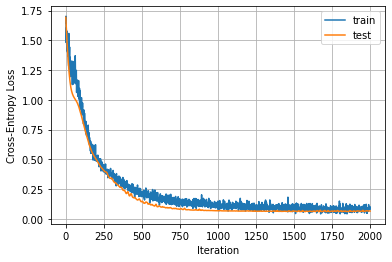

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.xlabel("Iteration")
plt.ylabel('Cross-Entropy Loss')
plt.grid()
plt.legend()
plt.show()

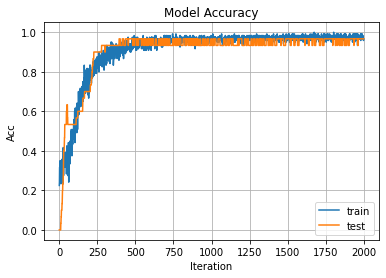

In [21]:
#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="test")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

In [22]:
keras_model.save("IrisModel")

INFO:tensorflow:Assets written to: IrisModel\assets


In [23]:
model2 = keras.models.load_model('IrisModel') # just need to give it a folder name here.
model2.summary()
predictions=model2(inputs_test)
accuracy_metric=keras.metrics.SparseCategoricalAccuracy()
print("Accuracy of saved model on test set",accuracy_metric(labels_test,predictions).numpy())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                100       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
Accuracy of saved model on test set 0.96666664


## End of lecture 3
